# Principal Component Analysis

PCA is a proper statistical technique used in `recognition`, `classification` and, `image compression`.

PCA is a technique whose primary purpose is to keep the data set with the highest variance in high-dimensional data but to provide dimention reduction at the same time.

Finding available features in over-dimensional data reduces the number of dimensions and compresses the data.

Some features will inevitably be lost with size reduction, but the intent is here these disappearing traits contain very little information about the poputation.

This method actually brings together highly correlated variables; it creates a smaller number of artificial variables sets called "`principal components`" and these are the ones that make the most variation in the data

### Components

The principal axes in the feature space represent the maximum variance directions in the data. The number of components can be entered while the algorithm is set up.

`Explained_variance`
It describes the amount of variance explained by each of the selected components

`Explained_variance_ratio`
It represents the percentage of variance explained by each of the selected components.

`n_components`
this helps us determine the estimated number of components.

`n_features`
This is just the number of features in the training set.

* Is PCA a Feature Selection Technique?  No
* Why is scaling of data necessary in PCA? 
* Is PCA Algorithm used in large Datasets?

##### Advantages

1. PCA removes correlated colums and improves algorithm performance.

2. With multidimensional data, the model may run slowly. Model performance increases with PCA.

3. PCA reduces overfiting.

4. Once of its most essential advantges is and its visualization power.

##### Disadvantages

1. With PCA the independent variables become less interpretable.

2. Because after applying PCA to the dataset, your original features are goin to turn into fundamental components.

**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Getting to know the dataset**

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
#digits
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
digits['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [15]:
df_data = pd.DataFrame(digits['data'], columns = digits['feature_names'])

In [17]:
df_data.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   
3        0.0        0.0        7.0       13.0       13.0        9.0   
4        0.0        0.0        0.0        2.0       16.0        4.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  
3        0.0        0.0  
4        0.0        0.0  

[5 rows x 64 columns]

In [18]:
df_data.shape

(1797, 64)

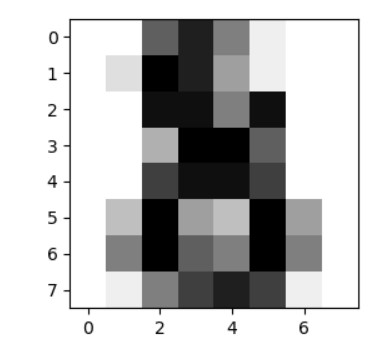

**Preparing for PCA**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data)

In [21]:
df_new = pd.DataFrame(scaled_data, columns = digits['feature_names'])

In [22]:
df_new.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0  -0.335016  -0.043081   0.274072  -0.664478  -0.844129   
1        0.0  -0.335016  -1.094937   0.038648   0.268751  -0.138020   
2        0.0  -0.335016  -1.094937  -1.844742   0.735366   1.097673   
3        0.0  -0.335016   0.377661   0.744919   0.268751  -0.844129   
4        0.0  -0.335016  -1.094937  -2.551014  -0.197863  -1.020657   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0  -0.409724  -0.125023  -0.059078  -0.624009  ...  -0.757436  -0.209785   
1  -0.409724  -0.125023  -0.059078  -0.624009  ...  -0.757436  -0.209785   
2  -0.409724  -0.125023  -0.059078  -0.624009  ...   0.259230  -0.209785   
3  -0.409724  -0.125023  -0.059078   1.879691  ...   1.072563  -0.209785   
4  -0.409724  -0.125023  -0.059078  -0.624009  ...  -0.757436  -0.209785   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0  -0.023596  -0.299081   0.086719   0.208293  -0.366771  -1.146647   
1  -0.023596  -0.299081  -1.089383  -0.249010   0.849632   0.548561   
2  -0.023596  -0.299081  -1.089383  -2.078218  -0.164037   1.565686   
3  -0.023596  -0.299081   0.282736   0.208293   0.241430   0.379040   
4  -0.023596  -0.299081  -1.089383  -2.306869   0.849632  -0.468564   

   pixel_7_6  pixel_7_7  
0  -0.505670  -0.196008  
1  -0.505670  -0.196008  
2   1.695137  -0.196008  
3  -0.505670  -0.196008  
4  -0.505670  -0.196008  

[5 rows x 64 columns]

**PCA with two components**

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 2) 

In [25]:
df_pca = pca.fit_transform(df_new)

In [26]:
df_pca.shape

(1797, 2)

In [27]:
component_df = pd.DataFrame(data = df_pca, columns=["first_component","second_component"])
component_df

first_component  second_component
0            1.914213         -0.954504
1            0.588980          0.924634
2            1.302022         -0.317315
3           -3.020764         -0.868732
4            4.528943         -1.093526
...               ...               ...
1792         0.104330          0.255027
1793         2.423234         -1.429635
1794         1.022604         -0.147848
1795         1.076054         -0.380896
1796        -1.257689         -2.227477

[1797 rows x 2 columns]

In [28]:
pca.explained_variance_

array([7.34477606, 5.83549053])

In [29]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12033916, 0.2159497 ])

**PCA with four components**

In [31]:
pca_new = PCA(n_components = 4) 

In [32]:
df_pca_new = pca_new.fit_transform(df_new)

In [33]:
component_df = pd.DataFrame(data = df_pca_new, columns=["first_component","second_component", "third_component", "fourth_component"])
component_df

first_component  second_component  third_component  fourth_component
0            1.914217         -0.954497        -3.946039          2.028771
1            0.588978          0.924633         3.924758         -1.779919
2            1.302037         -0.317197         3.023331         -2.043524
3           -3.020769         -0.868768        -0.801735         -2.187076
4            4.528955         -1.093471         0.973117         -1.419458
...               ...               ...              ...               ...
1792         0.104330          0.255026        -3.765859         -1.946921
1793         2.423231         -1.429625        -3.045256          2.631953
1794         1.022592         -0.147922         2.469961         -0.620284
1795         1.076051         -0.380905        -2.455481         -1.311825
1796        -1.257700         -2.227588         0.283620         -0.126871

[1797 rows x 4 columns]

In [34]:
pca_new.explained_variance_

array([7.34477606, 5.83549054, 5.15396118, 3.96623595])

In [35]:
pca_new.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408])

In [36]:
np.cumsum(pca_new.explained_variance_ratio_)

array([0.12033916, 0.21594971, 0.30039385, 0.36537793])